# HW 2
## Titanic Survival Predictions
In this dataset, you will train a logistic regression model that can predict the survivors based on a set of features about the passenger. Start first by taking sometime to understand your data. You can find more info about the data and its breakdown in this link https://www.kaggle.com/c/titanic/data

### Start with Data Exploring
Your data is split into two files. One for training and one for testing. Load both and find out the number of samples and features in each file

In [20]:
# import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# read in the csv files 
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

# get dimensions of the train and test sets
# (num_obs, num_features)
training.shape
testing.shape

(891, 12)

(418, 11)

How many survivors in the training set?

In [21]:
# count the survivors in the train set
training.Survived.sum()

342

Can you find Jack and Rose in the data? Use a code. You probably won't find them as they were fictional charachter. See if you can find Beatrice Irene Sandstorm? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [22]:
# check train and test sets for name = Jack
training[training['Name']=='Jack'].Name
testing[testing['Name']=='Jack'].Name

# check train and test sets for name = Rose
training[training['Name']=='Rose'].Name
testing[testing['Name']=='Rose'].Name

# check train and test sets for name = Beatrice Irene Sandstrom
training[training['Name']=='Sandstrom, Miss. Beatrice Irene'].Name
testing[testing['Name']=='Sandstrom, Miss. Beatrice Irene'].Name

# she is in the test set, row 117

Series([], Name: Name, dtype: object)

Series([], Name: Name, dtype: object)

Series([], Name: Name, dtype: object)

Series([], Name: Name, dtype: object)

Series([], Name: Name, dtype: object)

117    Sandstrom, Miss. Beatrice Irene
Name: Name, dtype: object

### Does features make difference?
In the training dataset 
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex  -  What was the survival rate of women?
- SibSp  -  What was the survival rate based on number of siblings the passenger had on the ship?
- Parch  - What was the survival rate based on number of parents/children the passenger had on the ship?

In [23]:
# rates are shown as percentages
# what was the survival rate per class?
a = training.groupby(by=['Survived','Pclass']).Survived.count()
(a/a.groupby(by='Pclass').sum()*100)[1]

# what was the survival rate of women?
b = training.groupby(by=['Survived','Sex']).Survived.count()
(b/b.groupby(by='Sex').sum()*100)[1]

# what was the survival rate based on number of siblings the passenger had on the ship?
c = training.groupby(by=['Survived','SibSp']).Survived.count()
(c/c.groupby(by='SibSp').sum()*100)[1]

#  what was the survival rate based on number of parents/children the passenger had on the ship?
d = training.groupby(by=['Survived','Parch']).Survived.count()
(d/d.groupby(by='Parch').sum()*100)[1]

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
Name: Survived, dtype: float64

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
5    20.000000
Name: Survived, dtype: float64

Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE2AD48BE0>,
      dtype=object)

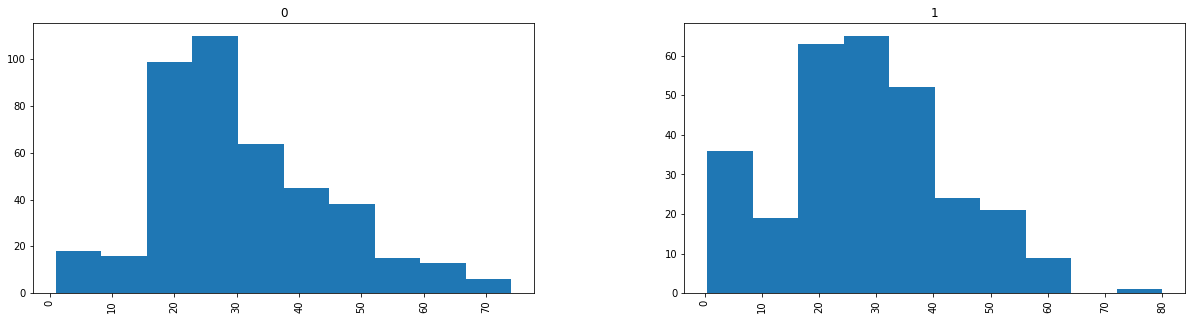

In [24]:
# plot the grouped histogram
# 0 = Didn't survive, 1 = Survived
training.Age.hist(by=training['Survived'],figsize=(20,5))

# Jack was more likely to die, because more people in his age group (20 years old) died than survived

Divide the age histograms on a 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE2ADC4C50>,
      dtype=object)

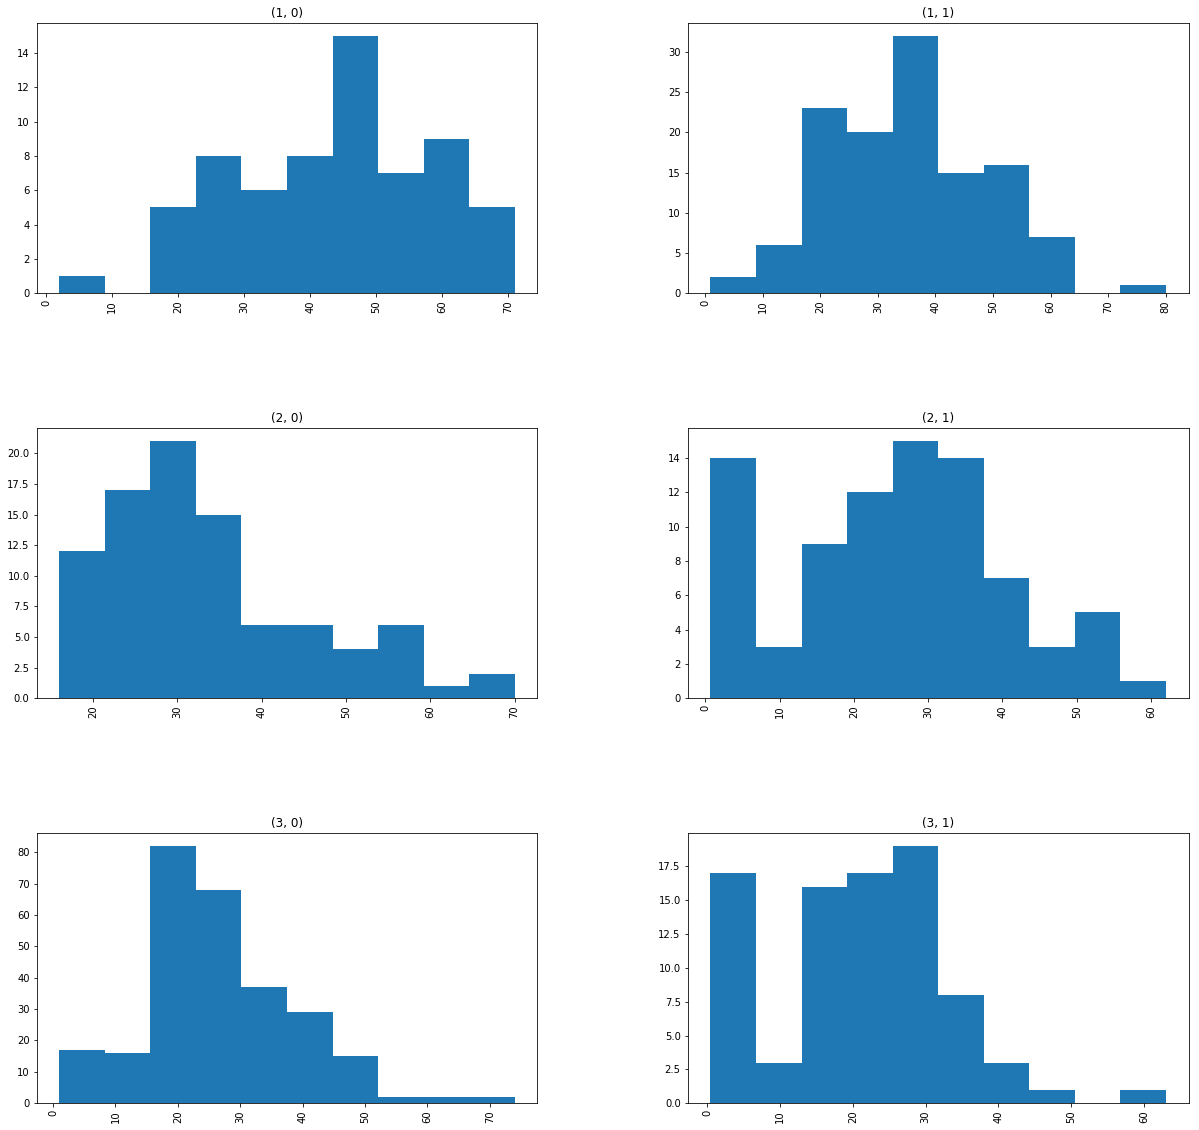

In [25]:
# plot the group histogram
# (Pclass, Survived)
training.Age.hist(by=[training['Pclass'],training['Survived']],figsize=(20,20))

## Fix missing Data in the Training Dataset
Which features in the training contains missing values? and how many missing values are there?

In [26]:
# check to see which featurees have nulls
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Find out the age median grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [27]:
# get the medians per group and replace the nulls
med_age_train = training.groupby(by=[training.Pclass, training.Sex]).Age.median()

training.loc[((training.Age.isna()) & (training.Pclass==1) & (training.Sex=='female')), 'Age'] = med_age_train[1]['female']
training.loc[((training.Age.isna()) & (training.Pclass==2) & (training.Sex=='female')), 'Age'] = med_age_train[2]['female']
training.loc[((training.Age.isna()) & (training.Pclass==3) & (training.Sex=='female')), 'Age'] = med_age_train[3]['female']
training.loc[((training.Age.isna()) & (training.Pclass==1) & (training.Sex=='male')), 'Age'] = med_age_train[1]['male']
training.loc[((training.Age.isna()) & (training.Pclass==2) & (training.Sex=='male')), 'Age'] = med_age_train[2]['male'] 
training.loc[((training.Age.isna()) & (training.Pclass==3) & (training.Sex=='male')), 'Age'] = med_age_train[3]['male']

training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For the Embarked column, substitute the missing value with the highest occurance value among the entire dataset

In [28]:
# get the mode and replace the nulls 
from statistics import mode 
training.loc[training.Embarked.isna(), 'Embarked'] = mode(training.Embarked)
training.isna().sum()                      

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Let's do our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [29]:
# drop unimportant features
training.drop(columns=['Cabin','Name','Ticket','PassengerId'], inplace=True)

Make sure now that your data does not have any nulls

In [30]:
# check to see which featurees have nulls
training.isna().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

% hint: `df_train['Embarked'].astype('category').cat.codes`

In [31]:
# convert categories into numerical values
training.Embarked = training.Embarked.astype('category').cat.codes
training.Sex = training.Sex.astype('category').cat.codes

You are now ready to build a logistic regression model and fit it 

In [32]:
# split the features from the label/target
feature = training.drop(columns=['Survived'])
target = training.Survived

# build and fit the model
model = LogisticRegression().fit(feature, target)

Show the training score. 

In [33]:
# print score, coefficients, and intercept
model.score(feature, target)
model.coef_
model.intercept_

0.8047138047138047

array([[-0.87746192, -2.45961747, -0.03038375, -0.30715022, -0.07641485,
         0.00453856, -0.12066927]])

array([4.0936783])

What are the coefficients. Make a plot that shows the importance of each feature in your model

<Figure size 720x360 with 0 Axes>

<BarContainer object of 7 artists>

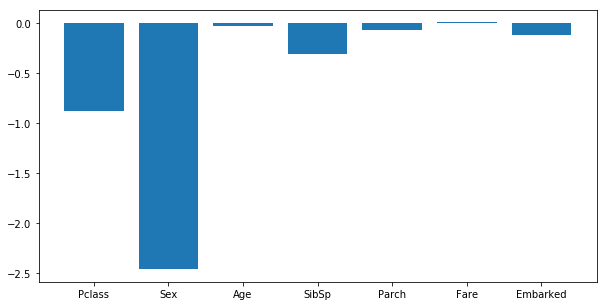

In [34]:
# display the optimal weights by feature
plt.figure(figsize=(10,5))
plt.bar(feature.columns, model.coef_[0])

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

In [35]:
# clean testing data same as training data
med_age_test = testing.groupby(by=[testing.Pclass, testing.Sex]).Age.median()

testing.loc[((testing.Age.isna()) & (testing.Pclass==1) & (testing.Sex=='female')), 'Age'] = med_age_test[1]['female']
testing.loc[((testing.Age.isna()) & (testing.Pclass==2) & (testing.Sex=='female')), 'Age'] = med_age_test[2]['female']
testing.loc[((testing.Age.isna()) & (testing.Pclass==3) & (testing.Sex=='female')), 'Age'] = med_age_test[3]['female']
testing.loc[((testing.Age.isna()) & (testing.Pclass==1) & (testing.Sex=='male')), 'Age'] = med_age_test[1]['male']
testing.loc[((testing.Age.isna()) & (testing.Pclass==2) & (testing.Sex=='male')), 'Age'] = med_age_test[2]['male'] 
testing.loc[((testing.Age.isna()) & (testing.Pclass==3) & (testing.Sex=='male')), 'Age'] = med_age_test[3]['male']

med_fare_test = testing.groupby(by=['Pclass']).Fare.median()
testing.loc[((testing.Fare.isna()) & (testing.Pclass==1)), 'Fare'] = med_fare_test[1]
testing.loc[((testing.Fare.isna()) & (testing.Pclass==2)), 'Fare'] = med_fare_test[2]
testing.loc[((testing.Fare.isna()) & (testing.Pclass==3)), 'Fare'] = med_fare_test[3]

# drop unimportant features
testing.drop(columns=['Cabin','Name','Ticket','PassengerId'], inplace=True)

# convert categories into numerical values
testing.Embarked = testing.Embarked.astype('category').cat.codes
testing.Sex = testing.Sex.astype('category').cat.codes

# validating NaNs are cleared
testing.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

How many will survive from the test dataset?

In [36]:
# predict using model and get the respective probabilities 
pred = model.predict(testing)
prob = model.predict_proba(testing)

# count testing survivors
pred.sum()

155

In [37]:
# this is the scaled version of the model

In [38]:
# library that standardizes data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(feature)
feature_scaled = scaler.transform(feature)

# create a model with scaled values 
# see if it yields better results
model_scaled = LogisticRegression().fit(feature_scaled, target)
pred_scaled = model_scaled.predict(scaler.transform(testing))

# scaled score for training and testing 
model_scaled.score(feature_scaled, target)
model_scaled.score(scaler.transform(testing), pred_scaled)

# predicted survivors
pred_scaled.sum()

# coefficient and intercept of scaled model
model_scaled.coef_
model_scaled.intercept_

0.8080808080808081

1.0

156

array([[-0.97497661, -1.27988999, -0.56637168, -0.37452556, -0.07090765,
         0.09214013, -0.15339128]])

array([-0.64209731])